<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Kurunegala_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Kurunegala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/kurunegala_joined_data.csv')


#**PREPARING DATASET FOR ANAYSIS**


In [4]:
# Assuming 'date' column is in string format
Kurunegala_data['date'] = pd.to_datetime(Kurunegala_data['date'])

In [5]:
Kurunegala_data.set_index('date', inplace=True)

In [6]:
Kurunegala_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [7]:
Kurunegala_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,21.72,21.86,14.47,87.81,0.09,98.16,4.32,47.31,6.38,47.19,0.000088,Kurunegala Proper,2019-01-01,2019-01-02,2019-01
2019-01-02,21.18,21.30,13.98,87.06,0.01,98.14,4.03,44.06,6.05,44.19,0.000137,Kurunegala Proper,2019-01-02,2019-01-03,2019-01
2019-01-03,20.96,20.98,13.55,86.38,0.02,98.19,3.91,38.00,5.84,37.81,0.000148,Kurunegala Proper,2019-01-03,2019-01-04,2019-01
2019-01-04,20.68,20.59,13.31,86.06,0.00,98.13,3.81,45.06,5.71,45.38,0.000000,Kurunegala Proper,2019-01-04,2019-01-05,2019-01
2019-01-05,22.26,22.37,15.44,88.88,0.04,97.99,4.02,42.44,5.98,42.50,0.000249,Kurunegala Proper,2019-01-05,2019-01-06,2019-01


In [8]:
Kurunegala_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,25.189934,25.473719,17.142766,84.396271,5.450772,97.609622,4.039545,171.970865,5.800854,171.814233,0.000132
std,1.546117,1.880549,1.290091,6.757771,8.319945,0.177362,1.811459,83.159654,2.326269,82.950500,0.000070
min,19.960000,19.670000,11.110000,51.620000,0.000000,97.100000,0.580000,20.690000,0.820000,20.880000,0.000000
25%,24.280000,24.370000,16.615000,81.690000,0.292500,97.480000,2.670000,77.075000,4.100000,77.265000,0.000089
50%,25.230000,25.380000,17.330000,85.845000,2.100000,97.600000,3.820000,227.440000,5.730000,227.125000,0.000120
75%,26.080000,26.420000,17.940000,88.880000,7.090000,97.730000,5.430000,239.940000,7.540000,239.690000,0.000172
max,30.540000,33.120000,20.390000,96.620000,97.890000,98.200000,9.670000,345.500000,13.150000,346.120000,0.000411


In [9]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Kurunegala_data = Kurunegala_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


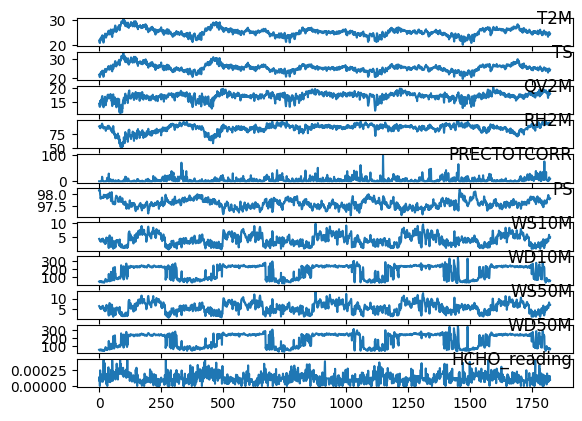

In [10]:
from matplotlib import pyplot as plt

values = Kurunegala_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Kurunegala_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


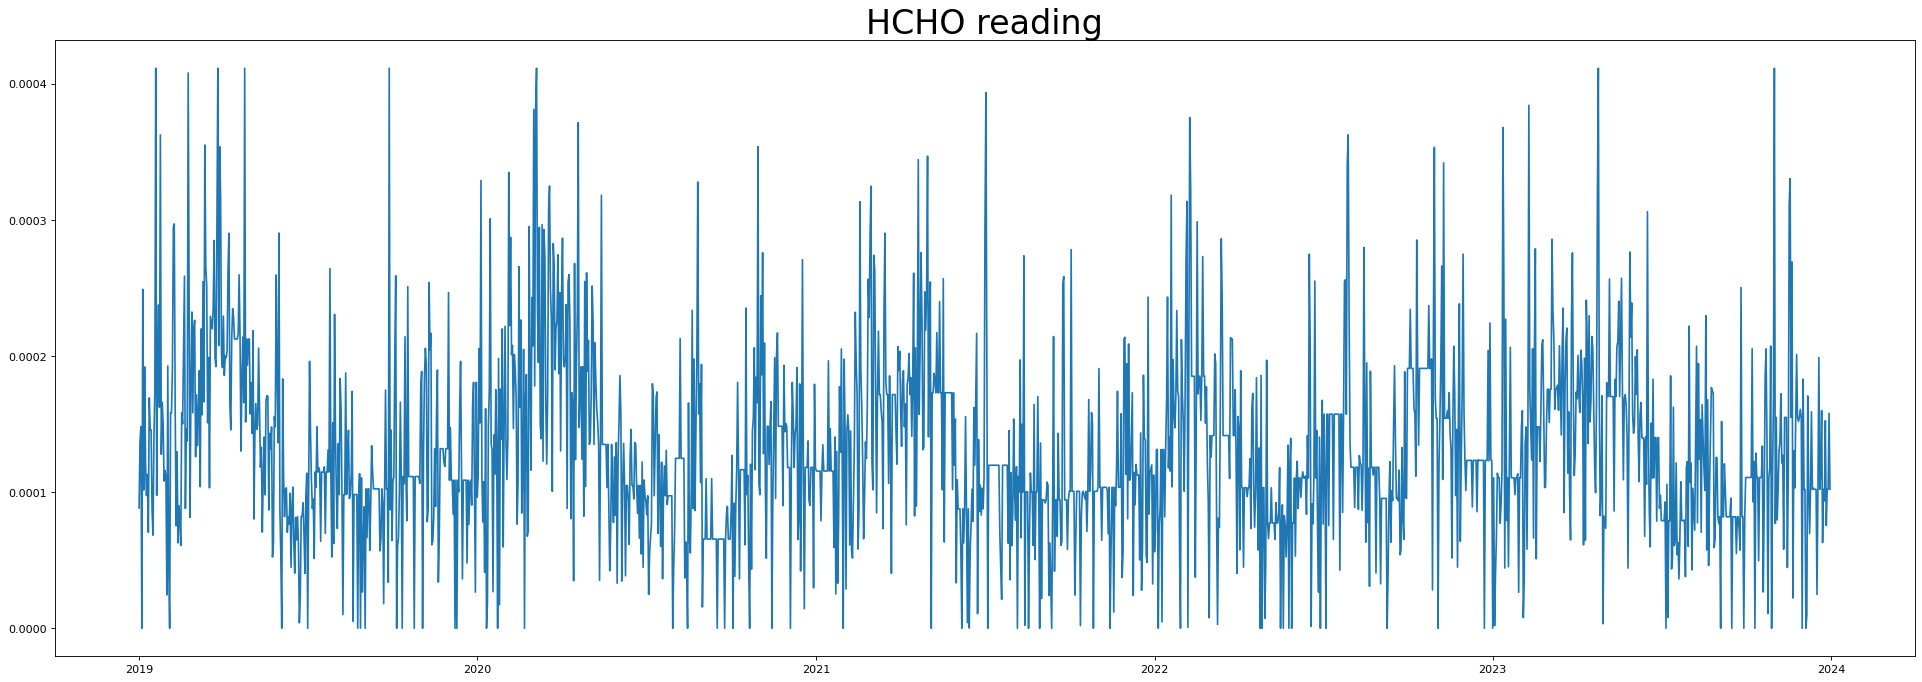

In [11]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Kurunegala_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


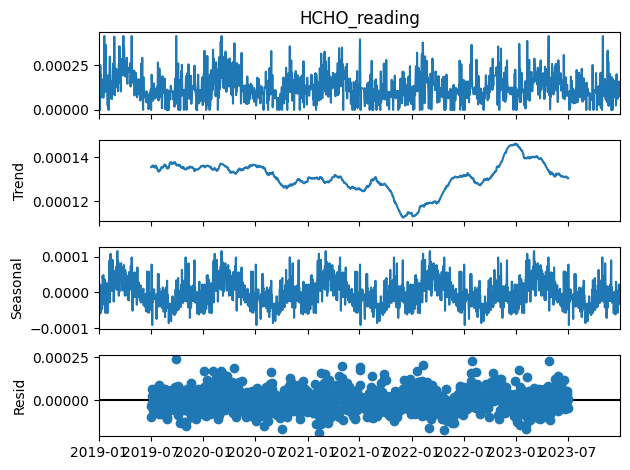

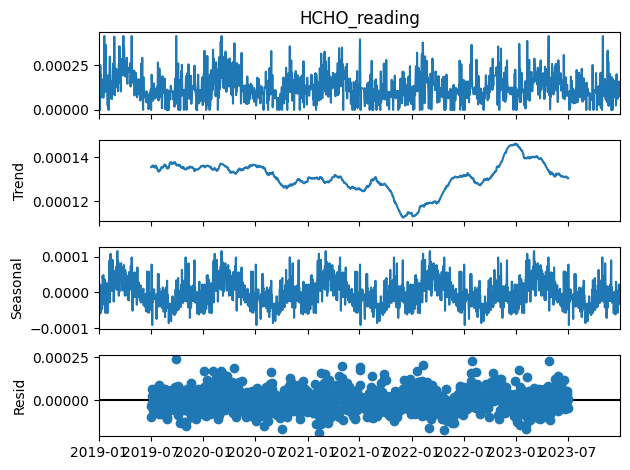

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Kurunegala_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


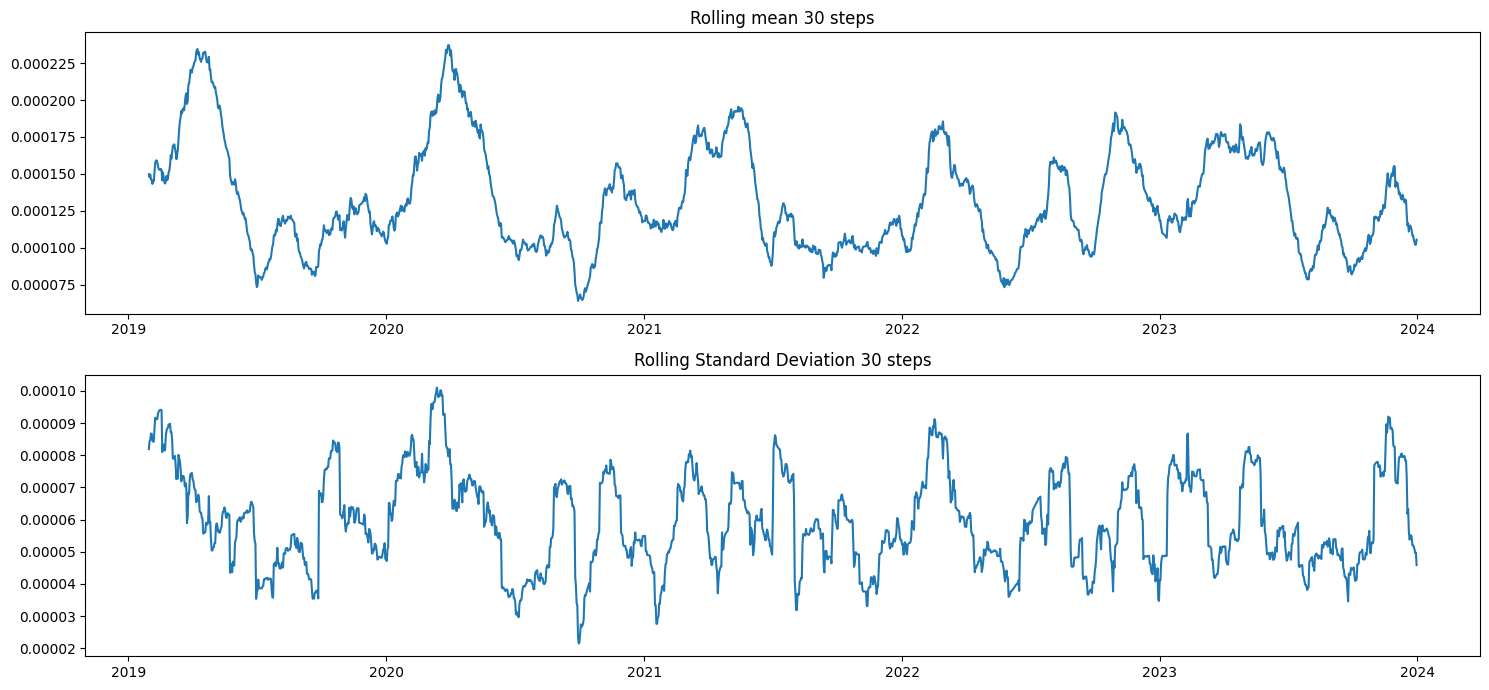

In [13]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Kurunegala_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Kurunegala_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


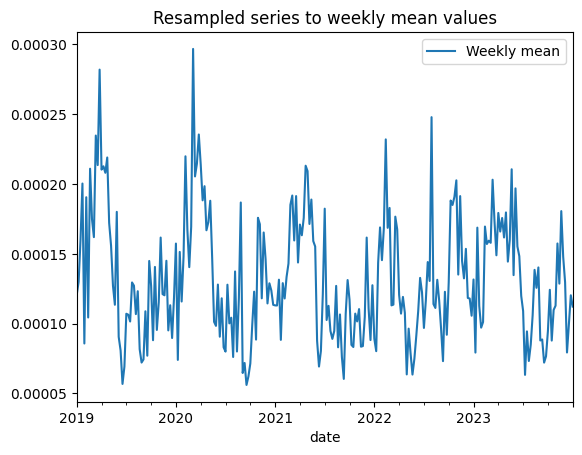

In [14]:
# Looking for weekly seasonality
resample = Kurunegala_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-16-b1687be1883d>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


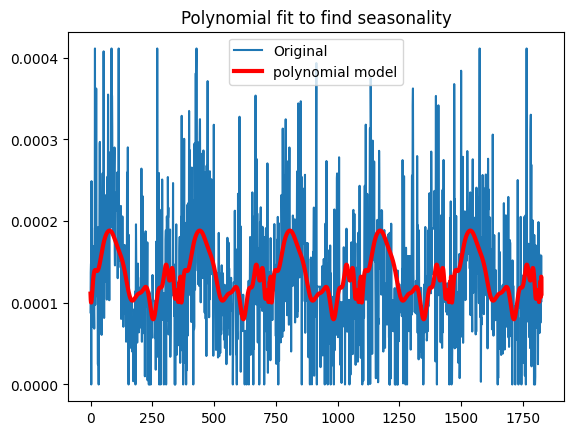

In [16]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Kurunegala_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


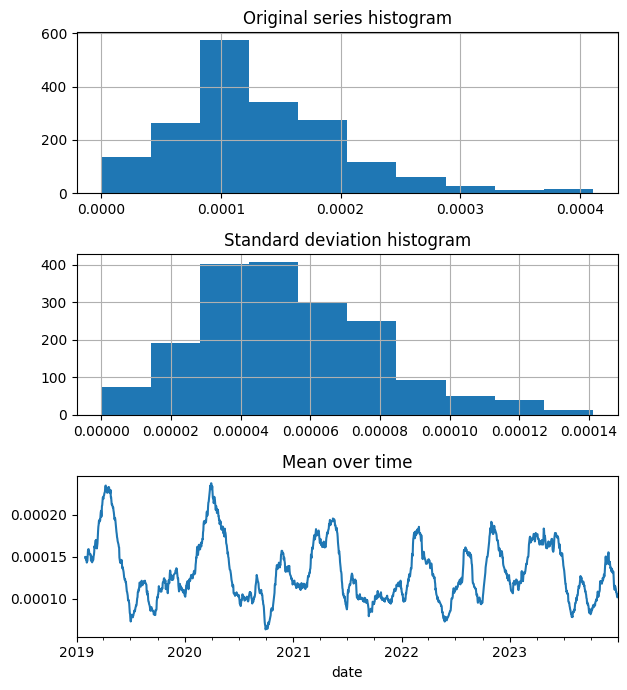

In [18]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Kurunegala_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Kurunegala_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Kurunegala_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


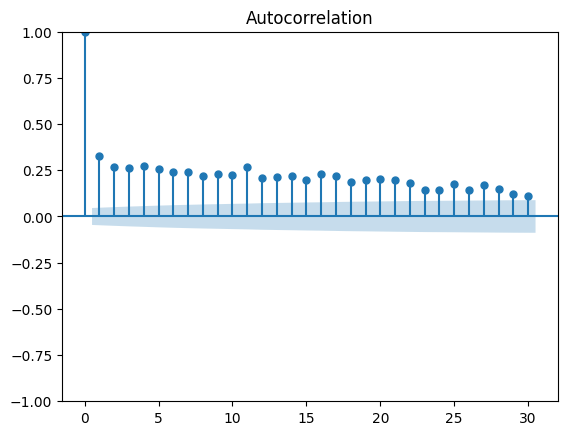

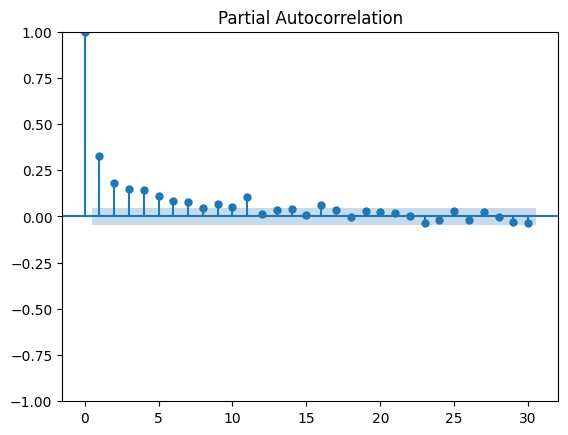

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [20]:
from statsmodels.tsa.stattools import adfuller

X = Kurunegala_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.127328
p-value: 0.000012
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
